<a href="https://colab.research.google.com/github/DenisaArtean/Diabetes-Prediction/blob/D5/Diabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns 

In [ ]:
data = pd.read_csv("/content/gdrive/MyDrive/diabetes.csv")
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# Input variables

**Pregnancies**: Number of times pregnant 

**Glucose** : Plasma glucose concentration a 2 hours in an oral glucose tolerance test

**BloodPressure** : Diastolic blood pressure (mm Hg)

**SkinThickness** : Triceps skin fold thickness (mm)

**Insulin** : 2-Hour serum insulin (mu U/ml)

**BMI** : Body mass index (weight in kg/(height in m)^2)

**DiabetesPedigreeFunction** : It provided some data on diabetes mellitus history in relatives and the genetic relationship of those relatives to the patient. A function that scores the likelihood of diabetes based on family history.

**Age**

**Outcome**





# Data exploration

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
data.shape

(768, 9)

In [ ]:
data.Outcome.value_counts()  # to see how many positive and negative samples there are

0    500
1    268
Name: Outcome, dtype: int64

([<matplotlib.axis.XTick at 0x7f2652f46350>,
 [Text(0, 0, 'No Diabetes'), Text(0, 0, 'Diabetes')])

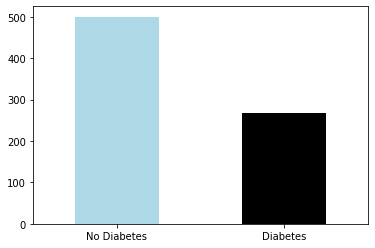

In [ ]:
data.Outcome.value_counts().plot(kind="bar", color=["lightblue", "black"])
plt.xticks(np.arange(2), ("No Diabetes", "Diabetes"), rotation = 0)

In [ ]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Text(0, 0.5, 'Blood Pressure')

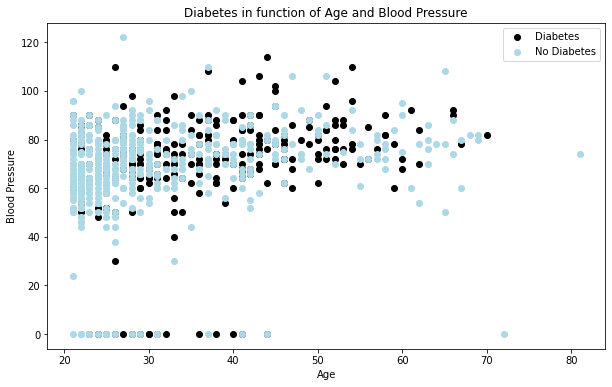

In [ ]:
plt.figure(figsize=(10,6))

# Positve examples
plt.scatter(data.Age[data.Outcome==1], 
            data.BloodPressure[data.Outcome==1], 
            c="black") 

# Negative examples
plt.scatter(data.Age[data.Outcome==0], 
            data.BloodPressure[data.Outcome==0], 
            c="lightblue") 
# axis always come as (x, y)

plt.title("Diabetes in function of Age and Blood Pressure")
plt.xlabel("Age")
plt.legend(["Diabetes", "No Diabetes"])
plt.ylabel("Blood Pressure")

Text(0, 0.5, 'Insulin')

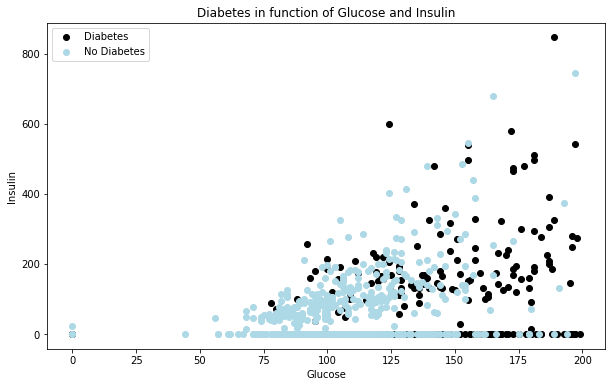

In [ ]:
plt.figure(figsize=(10,6))

# Positve examples
plt.scatter(data.Glucose[data.Outcome==1], 
            data.Insulin[data.Outcome==1], 
            c="black") 

# Negative examples
plt.scatter(data.Glucose[data.Outcome==0], 
            data.Insulin[data.Outcome==0], 
            c="lightblue") 
# axis always come as (x, y)

plt.title("Diabetes in function of Glucose and Insulin")
plt.xlabel("Glucose")
plt.legend(["Diabetes", "No Diabetes"])
plt.ylabel("Insulin")

Text(0, 0.5, 'BMI')

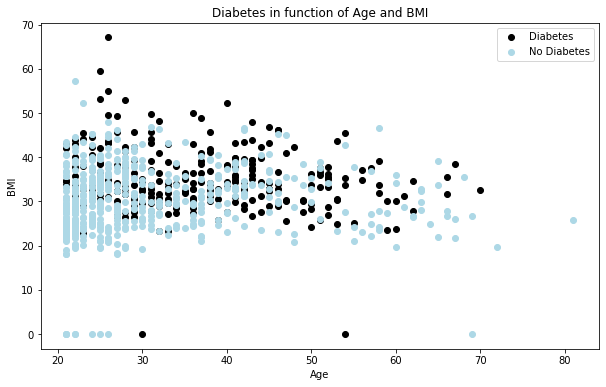

In [ ]:
plt.figure(figsize=(10,6))

# Positve examples
plt.scatter(data.Age[data.Outcome==1], 
            data.BMI[data.Outcome==1], 
            c="black") 

# Negative examples
plt.scatter(data.Age[data.Outcome==0], 
            data.BMI[data.Outcome==0], 
            c="lightblue") 
# axis always come as (x, y)

plt.title("Diabetes in function of Age and BMI")
plt.xlabel("Age")
plt.legend(["Diabetes", "No Diabetes"])
plt.ylabel("BMI")

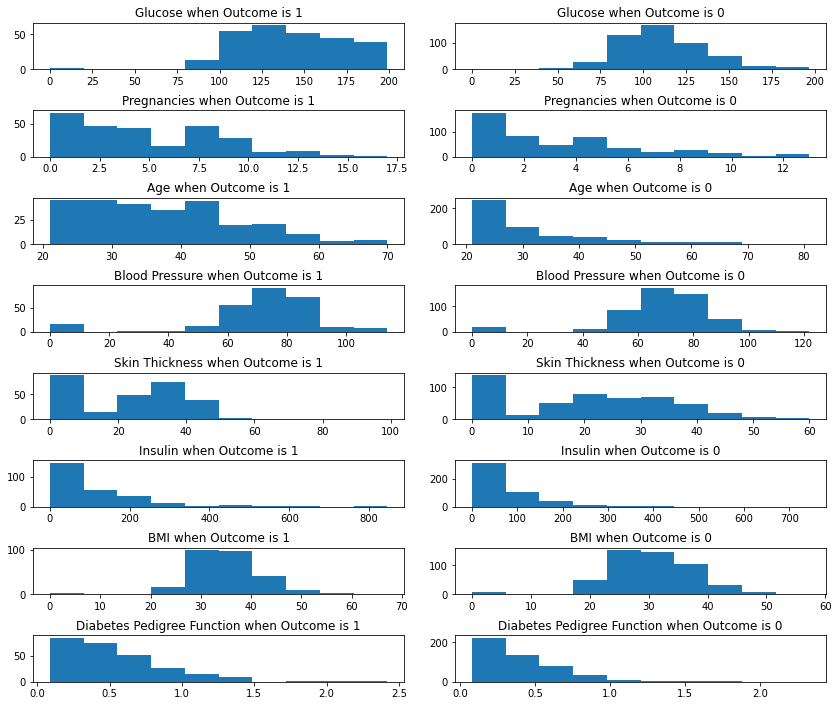

In [ ]:
fig, ax = plt.subplots(nrows=8, ncols=2, figsize=(12, 10))
fig.tight_layout(pad = 2.0)
ax[0,0].set_title('Glucose when Outcome is 1')
ax[0,0].hist(data.Glucose[data.Outcome==1]);
ax[0,1].set_title('Glucose when Outcome is 0')
ax[0,1].hist(data.Glucose[data.Outcome==0]);

ax[1,0].set_title('Pregnancies when Outcome is 1')
ax[1,0].hist(data.Pregnancies[data.Outcome==1]);
ax[1,1].set_title('Pregnancies when Outcome is 0')
ax[1,1].hist(data.Pregnancies[data.Outcome==0]);

ax[2,0].set_title('Age when Outcome is 1')
ax[2,0].hist(data.Age[data.Outcome==1]);
ax[2,1].set_title('Age when Outcome is 0')
ax[2,1].hist(data.Age[data.Outcome==0]);

ax[3,0].set_title('Blood Pressure when Outcome is 1')
ax[3,0].hist(data.BloodPressure[data.Outcome==1]);
ax[3,1].set_title('Blood Pressure when Outcome is 0')
ax[3,1].hist(data.BloodPressure[data.Outcome==0]);

ax[4,0].set_title('Skin Thickness when Outcome is 1')
ax[4,0].hist(data.SkinThickness[data.Outcome==1]);
ax[4,1].set_title('Skin Thickness when Outcome is 0')
ax[4,1].hist(data.SkinThickness[data.Outcome==0]);

ax[5,0].set_title('Insulin when Outcome is 1')
ax[5,0].hist(data.Insulin[data.Outcome==1]);
ax[5,1].set_title('Insulin when Outcome is 0')
ax[5,1].hist(data.Insulin[data.Outcome==0]);

ax[6,0].set_title('BMI when Outcome is 1')
ax[6,0].hist(data.BMI[data.Outcome==1]);
ax[6,1].set_title('BMI when Outcome is 0')
ax[6,1].hist(data.BMI[data.Outcome==0]);

ax[7,0].set_title('Diabetes Pedigree Function when Outcome is 1')
ax[7,0].hist(data.DiabetesPedigreeFunction[data.Outcome==1]);
ax[7,1].set_title('Diabetes Pedigree Function when Outcome is 0')
ax[7,1].hist(data.DiabetesPedigreeFunction[data.Outcome==0]);

In [ ]:
data.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


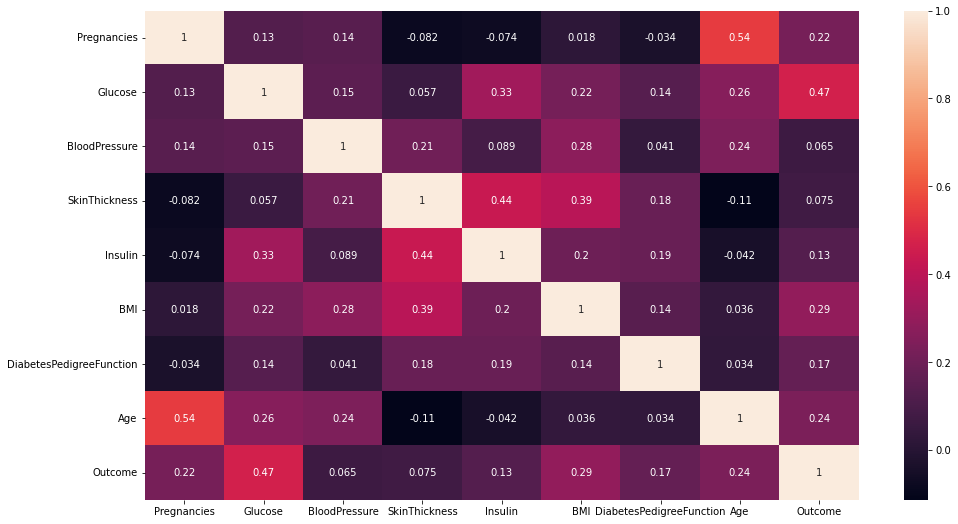

In [ ]:
plt.figure(figsize = (16,9))
sns.heatmap(data.corr(), annot=True)

In [ ]:
#sns.pairplot(data, hue='Outcome')

# Data Cleaning

In [ ]:
data.isnull()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
763,False,False,False,False,False,False,False,False,False
764,False,False,False,False,False,False,False,False,False
765,False,False,False,False,False,False,False,False,False
766,False,False,False,False,False,False,False,False,False


In [ ]:
data.isna()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
763,False,False,False,False,False,False,False,False,False
764,False,False,False,False,False,False,False,False,False
765,False,False,False,False,False,False,False,False,False
766,False,False,False,False,False,False,False,False,False


In [ ]:
data.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [ ]:
data.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
763    False
764    False
765    False
766    False
767    False
Length: 768, dtype: bool

In [ ]:
data_clean = data.copy()

In [ ]:
print("Number of 0's for Glucose:", data_clean['Glucose'].isin([0]).sum())
print("Number of 0's for Blood Pressure:", data_clean['BloodPressure'].isin([0]).sum())
print("Number of 0's for Skin Thickness:", data_clean['SkinThickness'].isin([0]).sum())
print("Number of 0's for Insulin:", data_clean['Insulin'].isin([0]).sum())
print("Number of 0's for BMI:", data_clean['BMI'].isin([0]).sum())

Number of 0's for Glucose: 5
Number of 0's for Blood Pressure: 35
Number of 0's for Skin Thickness: 227
Number of 0's for Insulin: 374
Number of 0's for BMI: 11


In [ ]:
# Replacing 0 values in these columns with mean
data_clean['Glucose'] = data_clean['Glucose'].replace(0, data['Glucose'].mean())
data_clean['BloodPressure'] = data_clean['BloodPressure'].replace(0, data['BloodPressure'].mean())
data_clean['SkinThickness'] = data_clean['SkinThickness'].replace(0, data['SkinThickness'].mean())
data_clean['Insulin'] = data_clean['Insulin'].replace(0, data['Insulin'].mean())
data_clean['BMI'] = data_clean['BMI'].replace(0, data['BMI'].mean())

In [ ]:
data_clean.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.681605,72.254807,26.606479,118.660163,32.450805,0.471876,33.240885,0.348958
std,3.369578,30.436016,12.115932,9.631241,93.080358,6.875374,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,20.536458,79.799479,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,79.799479,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Text(0, 0.5, 'BMI')

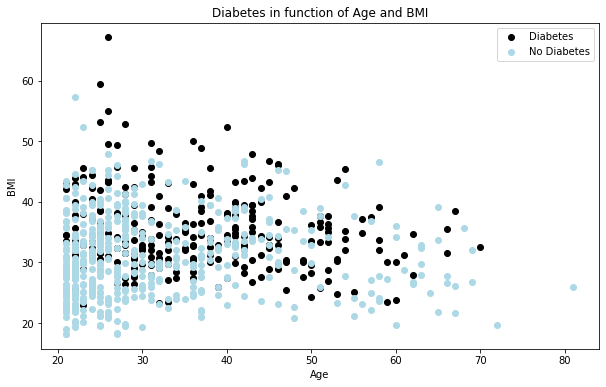

In [ ]:
plt.figure(figsize=(10,6))

# Positve examples
plt.scatter(data_clean.Age[data_clean.Outcome==1], 
            data_clean.BMI[data_clean.Outcome==1], 
            c="black") 

# Negative examples
plt.scatter(data_clean.Age[data_clean.Outcome==0], 
            data_clean.BMI[data_clean.Outcome==0], 
            c="lightblue") 
# axis always come as (x, y)

plt.title("Diabetes in function of Age and BMI")
plt.xlabel("Age")
plt.legend(["Diabetes", "No Diabetes"])
plt.ylabel("BMI")

Text(0, 0.5, 'Blood Pressure')

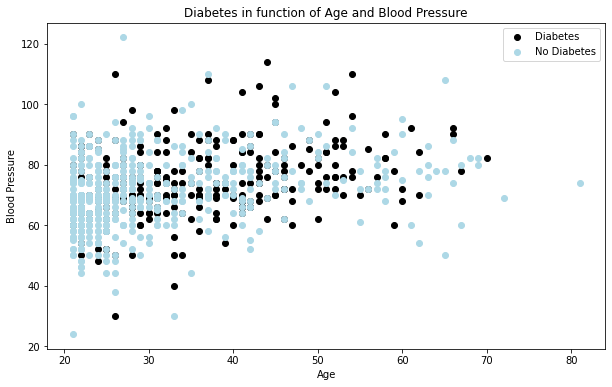

In [ ]:
plt.figure(figsize=(10,6))

# Positve examples
plt.scatter(data_clean.Age[data_clean.Outcome==1], 
            data_clean.BloodPressure[data_clean.Outcome==1], 
            c="black") 

# Negative examples
plt.scatter(data_clean.Age[data_clean.Outcome==0], 
            data_clean.BloodPressure[data_clean.Outcome==0], 
            c="lightblue") 
# axis always come as (x, y)

plt.title("Diabetes in function of Age and Blood Pressure")
plt.xlabel("Age")
plt.legend(["Diabetes", "No Diabetes"])
plt.ylabel("Blood Pressure")

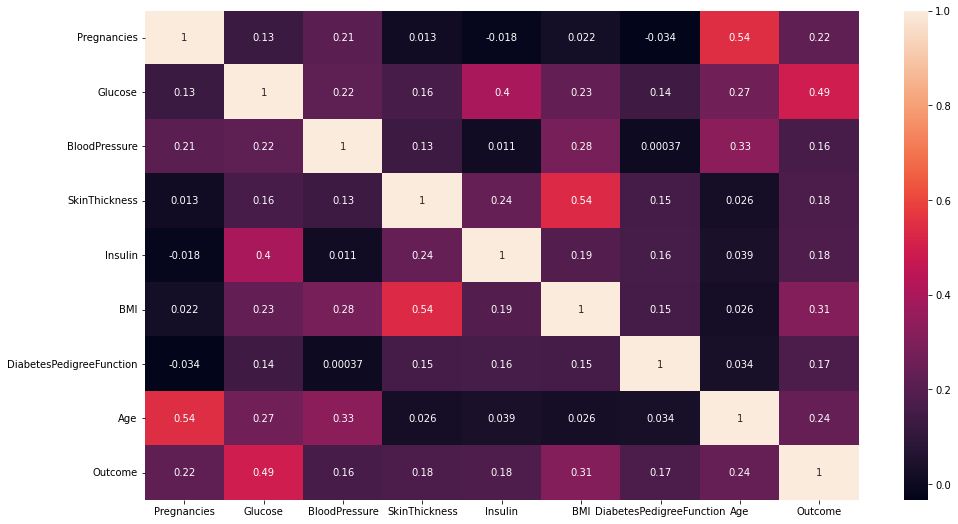

In [ ]:
plt.figure(figsize = (16,9))
sns.heatmap(data_clean.corr(), annot=True)

# Modeling

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler


**Train Test Split**

In [ ]:
#Spliting the data
X = data_clean[data_clean.columns[:8]]
y = data_clean.Outcome
X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size=0.2, random_state = 42)

In [ ]:
(len(X_train),len(X_test))

(614, 154)

In [ ]:
scaler = StandardScaler()
scaler.fit(data_clean[data_clean.columns[:8]])

StandardScaler()

In [ ]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
log_reg = LogisticRegression(random_state=0)
y_train = pd.Series.ravel(y_train)

log_reg.fit(X_train,y_train);

log_reg_pred = log_reg.predict(X_test)

log_reg2 = log_reg.score(X_test,y_test)
print(log_reg2)

print('Accuracy :', accuracy_score(y_test, log_reg_pred)*100)

0.7662337662337663
Accuracy : 76.62337662337663


In [ ]:
print(classification_report(y_test, log_reg_pred))

              precision    recall  f1-score   support

           0       0.81      0.84      0.82        99
           1       0.69      0.64      0.66        55

    accuracy                           0.77       154
   macro avg       0.75      0.74      0.74       154
weighted avg       0.76      0.77      0.76       154



In [ ]:
# Fit an instance of LogisticRegression
clf = LogisticRegression(C=0.20433597178569418,
                         solver="liblinear")

clf.fit(X_train, y_train);

In [ ]:
feature_dict = dict(zip(data_clean.columns, list(clf.coef_[0])))
feature_dict

{'Age': 0.378447635457425,
 'BMI': 0.6632736561775203,
 'BloodPressure': -0.13501222703071075,
 'DiabetesPedigreeFunction': 0.1980505085301638,
 'Glucose': 1.0550665053905233,
 'Insulin': -0.14989585043933476,
 'Pregnancies': 0.2186091074644186,
 'SkinThickness': 0.02826670451167441}

In [ ]:
clf.coef_

array([[ 0.21860911,  1.05506651, -0.13501223,  0.0282667 , -0.14989585,
         0.66327366,  0.19805051,  0.37844764]])

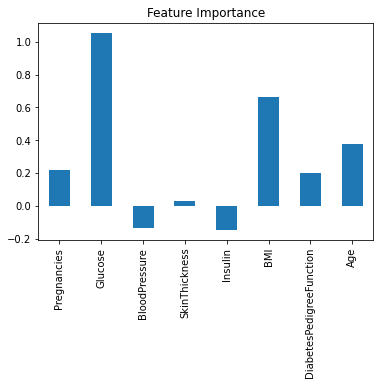

In [ ]:
# Visualize feature importance
feature_df = pd.DataFrame(feature_dict, index=[0])
feature_df.T.plot.bar(title="Feature Importance", legend=False);

# Loading and saving the model

In [ ]:
import pickle

# Save trained model to file. 
pickle.dump([log_reg, scaler], open("diabetes.pkl", "wb"))  #Serialize the object and convert it into a “byte stream”

In [ ]:
#Load the model 

loaded_model, scaler = pickle.load(open("diabetes.pkl", "rb")) #deserealize
loaded_model.predict(X_test)
loaded_model.score(X_test,y_test)

0.7662337662337663

**Making predictions on new data**

In [ ]:
data = {'Pregnancies': [10], 'Glucose': [101.0], "BloodPressure": [76.0], 'SkinThickness': [48], 'Insulin': [180], 'BMI': [32.9],
        'DiabetesPedigreeFunction': [0.171], 'Age': [63]}
row_df = pd.DataFrame.from_dict(data)
row_df = scaler.transform(row_df)

In [ ]:
prob = loaded_model.predict_proba(row_df)[0][1]
print(f"The probability of you having Diabetes is {prob*100}")

The probability of you having Diabetes is 38.481633315475875


In [ ]:
loaded_model.predict(row_df)[0]

0